# obtain similar values of C1, C2, and C3

In [ ]:
import math
import random
import numpy as np
from numpy.linalg import inv

current_seed = 0
np.random.seed(current_seed)
def generate_data(n, seed=11, force_seed=False):
    global current_seed

    if current_seed !=  seed or force_seed:
        np.random.seed(seed)
        current_seed = seed
    noise_range = 1.2
    noise = np.random.uniform(-noise_range, noise_range)
    return (2 * np.sin(0.05 * np.pi * n) + noise, noise)

def get_coefficients(input_matrix, result_matrix, print_values = False):
    input_inverse = inv(input_matrix)
    coefficient_matrix = np.dot(input_inverse, result_matrix)
    if print_values: 
        print(f'coefficient matrix:\n{coefficient_matrix}\n')

    return coefficient_matrix

sum_c1 = sum_c2 = sum_c3 = sum_n1 = sum_n2 = sum_n3 = sum_n4 = 0
max_n = 20
data_values = []
noise_values = []
for i in range(max_n):
    n = i + 1
    n2 = n**2
    n3 = n**3
    n4 = n**4

    sum_n1 += n
    sum_n2 += n2
    sum_n3 += n3
    sum_n4 += n4
    force_seed = False
    if i == 0:
        force_seed = True
    value, rnd = generate_data(n, 11, force_seed)
    data_values.append(value)
    noise_values.append(rnd)
    sum_c1 += value
    sum_c2 += value * n
    sum_c3 += value * n2

input_matrix = np.array([[max_n, sum_n1, sum_n2],
                         [sum_n1, sum_n2, sum_n3],
                         [sum_n2, sum_n3, sum_n4]])

# print(f'data_values: {data_values}')
# checking the result matrix of the example, to verify the code works.
example_matrix = np.array([27.7347, 296.1023, 3499.9838])
print('example values:')
coefficients = get_coefficients(input_matrix, example_matrix, True)

result_matrix = np.array([sum_c1, sum_c2, sum_c3])
print(f'result matrix:\n{result_matrix}\n')

coefficients =  get_coefficients(input_matrix, result_matrix)
c1, c2, c3 = coefficients
print(f'c1: {c1}, c2: {c2}, c3: {c3}')

data_values: [np.float64(-0.4544838166152922), np.float64(-0.5352254316798061), np.float64(0.8197054630751206), np.float64(1.715411934646101), np.float64(1.222702213383641), np.float64(1.5830590243525726), np.float64(0.6126870033941965), np.float64(1.871804890157999), np.float64(3.0357126468143543), np.float64(2.8419082145042687), np.float64(2.52729140972024), np.float64(0.9630796050758472), np.float64(2.7273830570609308), np.float64(2.4752041817246857), np.float64(0.6104214446016403), np.float64(1.4931721377613372), np.float64(-0.24285832982194777), np.float64(-0.30179656617806605), np.float64(-0.12784952204944106), np.float64(-0.8210104639801511)]
example values:
coefficient matrix:
[-1.24567386  0.7042314  -0.03318481]

result matrix:
[  22.0163191   212.5142337  2167.31132123]

c1: -1.2371901664298177, c2: 0.6899238696308299, c3: -0.034189508779766495


# J error value

In [38]:
n_values = np.arange(1, 21)
x_hat = c1 + c2 * n_values + c3 * n_values **2
j_error = np.sum((data_values - x_hat) ** 2)
print(f'j error: {j_error}')


j error: 8.32134714776697


# run the code 15 times
the averages and standard deviations are printed out in the end

In [39]:
def generate_coefficients(seed):
    sum_c1 = sum_c2 = sum_c3 = sum_n1 = sum_n2 = sum_n3 = sum_n4 = 0
    max_n = 20
    data_values_local = []
    noise_values = []
    for i in range(max_n):
        n = i + 1
        n2 = n**2
        n3 = n**3
        n4 = n**4

        sum_n1 += n
        sum_n2 += n2
        sum_n3 += n3
        sum_n4 += n4
        
        value, rnd = generate_data(n, seed)
        data_values_local.append(value)
        noise_values.append(rnd)
        sum_c1 += value
        sum_c2 += value * n
        sum_c3 += value * n2

    input_matrix = np.array([[max_n, sum_n1, sum_n2],
                            [sum_n1, sum_n2, sum_n3],
                            [sum_n2, sum_n3, sum_n4]])

    result_matrix = np.array([sum_c1, sum_c2, sum_c3])

    return get_coefficients(input_matrix, result_matrix)
    
c1_values = []
c2_values = []
c3_values = []
for i in range(15):
    coefficients = generate_coefficients(i)
    c1_local, c2_local, c3_local = coefficients
    c1_values.append(c1_local)
    c2_values.append(c2_local)
    c3_values.append(c3_local)

c1_min, c1_max, c1_avg, c1_std = np.min(c1_values), np.max(c1_values), np.mean(c1_values), np.std(c1_values)
c2_min, c2_max, c2_avg, c2_std = np.min(c2_values), np.max(c2_values), np.mean(c2_values), np.std(c2_values)
c3_min, c3_max, c3_avg, c3_std = np.min(c3_values), np.max(c3_values), np.mean(c3_values), np.std(c3_values)
print(f'c1 - min: {c1_min},\tmax: {c1_max},\tavg: {c1_avg},\tstd: {c1_std}')
print(f'c2 - min: {c2_min},\tmax: {c2_max},\tavg: {c2_avg},\tstd: {c2_std}')
print(f'c3 - min: {c3_min},\tmax: {c3_max},\tavg: {c3_avg},\tstd: {c3_std}')

c1 - min: -1.2371901664298177,	max: 0.8811601531271946,	avg: -0.06056235836826597,	std: 0.5854921637168973
c2 - min: 0.24689038640338007,	max: 0.6899238696308299,	avg: 0.39157576853308285,	std: 0.11066305739700885
c3 - min: -0.034189508779766495,	max: -0.013570276401278525,	avg: -0.01956301425154491,	std: 0.005212053606590324


# plotting different solutions, similair o the 5.1 graph

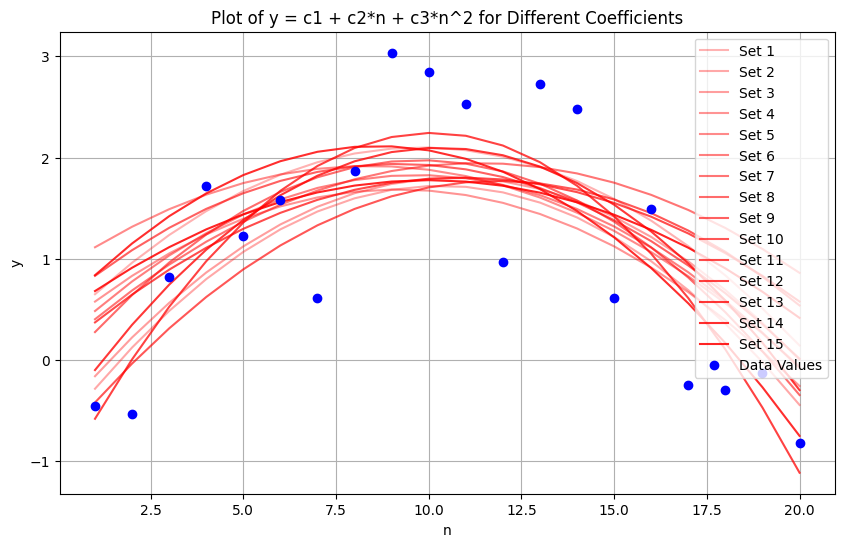

In [40]:
import matplotlib.pyplot as plt

n_values = np.arange(1, 21)

# Plotting the function for each set of coefficients
plt.figure(figsize=(10, 6))
for i in range(len(c1_values)):
    y_values = c1_values[i] + c2_values[i] * n_values + c3_values[i] * n_values ** 2
    plt.plot(n_values, y_values, label=f'Set {i+1}', color='red', alpha=0.3 + (0.6 * i / len(c1_values)))

plt.plot(n_values, data_values, 'o', label='Data Values', color='blue')
plt.xlabel('n')
plt.ylabel('y')
plt.title('Plot of y = c1 + c2*n + c3*n^2 for Different Coefficients')
plt.legend()
plt.grid(True)
plt.show()

# code for more coefficients.

Here i made a function, where you give the coefficient count, and it will do all the calculations.
## Typical values of J
The typical values of J are printed out below. You can see that up to two 15 coefficients it seems to be ok, but afterwards not so much.

In [71]:
def get_error(coefficients_list, data_values):
    n_values = np.arange(1, 21)
    x_hat = 0
    for i in range(len(coefficients_list)):
        x_hat += coefficients_list[i] * n_values ** i

    return np.sum((data_values - x_hat) ** 2)

def generate_coefficients(coefficient_count, max_n = 20):
    
    data_values = []
    sum_n_list = [0] *  (2 * coefficient_count - 1) 
    sum_coefficient= [0] * coefficient_count
    

    for i in range(max_n):
        n = i + 1
        for j in range(len(sum_n_list)):
            sum_n_list[j] += n ** j
        
        force_seed = False
        if i == 0:
            force_seed = True
            
        value, _ = generate_data(n, 11, force_seed)
        
        data_values.append(value)

        for j in range(coefficient_count):
            sum_coefficient[j] += value * (n**j)

    input_matrix = np.zeros((coefficient_count, coefficient_count))
    for i in range(coefficient_count):
            input_matrix[i] = sum_n_list[i:i+coefficient_count]

    result_matrix = np.zeros(coefficient_count)


    return get_coefficients(input_matrix, sum_coefficient), data_values
number_of_coefficients = 20
number_of_itterations = 40
j_values = np.zeros((number_of_coefficients, number_of_itterations))
for i in range(1, number_of_itterations):
    for j in range(1, number_of_coefficients):
        coefficients, data_values = generate_coefficients(j)
        error = get_error(coefficients, data_values)
        j_values[j, i] = error

for i in range(1, number_of_coefficients):
    print(f'[{i}]j mean: {np.mean(j_values[i])}')

[1]j mean: 28.63223157271678
[2]j mean: 28.12187697529388
[3]j mean: 8.113313469072796
[4]j mean: 8.099009954455596
[5]j mean: 7.8401923180342745
[6]j mean: 7.379305021687995
[7]j mean: 7.32422450256518
[8]j mean: 7.09600633448446
[9]j mean: 6.819815047295087
[10]j mean: 4.9738215966714865
[11]j mean: 4.958764522718231
[12]j mean: 5.9265508515408785
[13]j mean: 5.822369262110136
[14]j mean: 9.522584885857807
[15]j mean: 4.540705383507598
[16]j mean: 3382256564485.5015
[17]j mean: 3.682250046184625e+16
[18]j mean: 1331211518572.5186
[19]j mean: 33056637744292.125


## Overfitting
I've tested for overfitting by increasing the data range. 
after some trial and error, I chose 11 coefficients to test with.

In the graph you can see it will go greatly when trying to plot 78 datapoints. But when doing the 79th one, it will go to an unexpected low value. This means there's definitely overfitting going on.

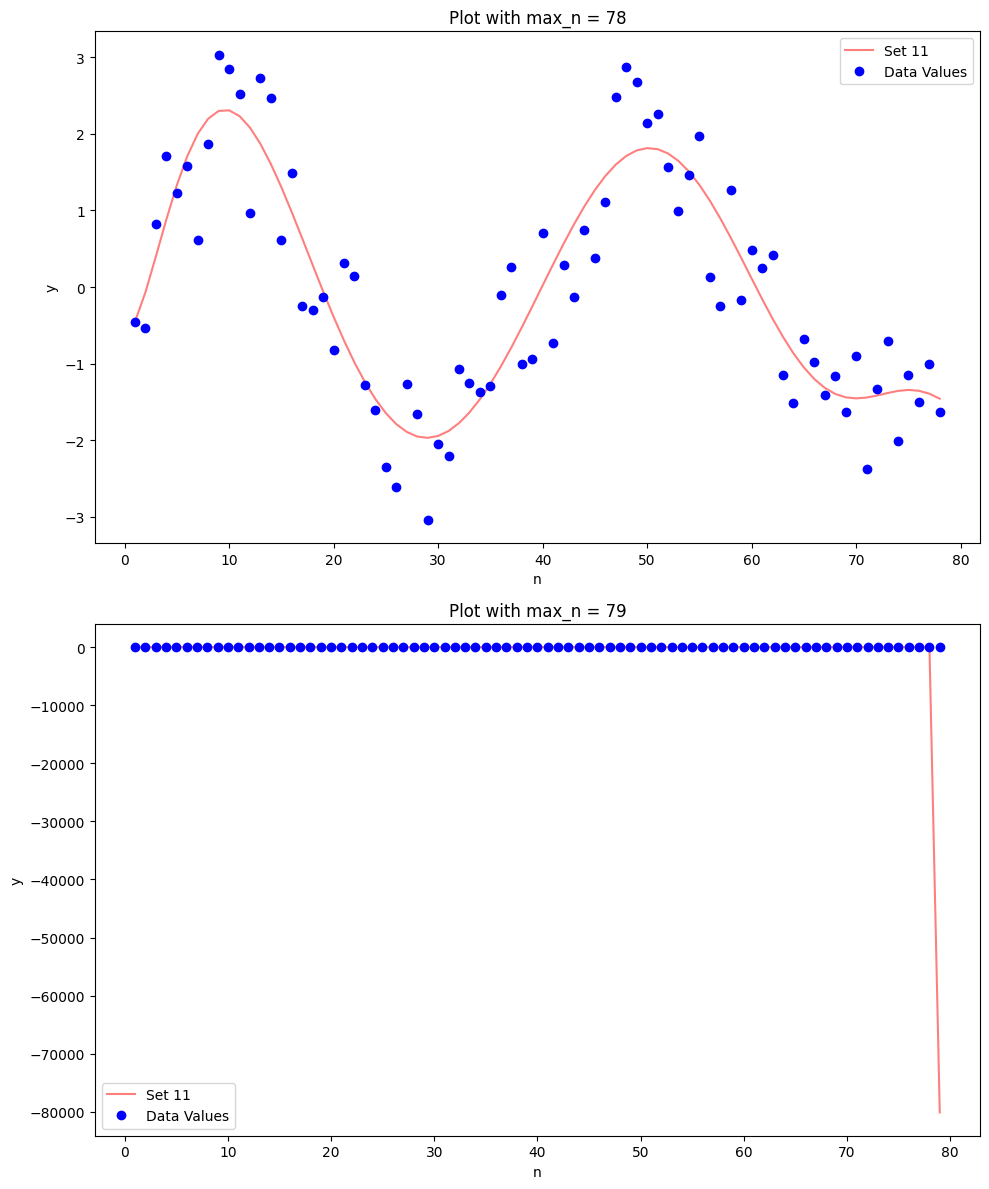

In [65]:
coefficient = 11

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Define a function to generate coefficients and data values (assuming this is defined elsewhere)
# coefficients, data_values = generate_coefficients(coefficient, max_n=max_n)

# First plot with max_n = 78
max_n_1 = 78
coefficients_1, data_values_1 = generate_coefficients(coefficient, max_n=max_n_1)
n_values_1 = np.arange(1, max_n_1 + 1)    
y_values_1 = np.zeros_like(n_values_1, dtype=float) 
for j in range(len(coefficients_1)):
    y_values_1 += coefficients_1[j] * (n_values_1 ** j)

# Plot y_values for max_n = 78
ax[0].plot(n_values_1, y_values_1, label=f'Set {coefficient}', color='red', alpha=0.5)
ax[0].plot(n_values_1, data_values_1, 'o', label='Data Values', color='blue')
ax[0].set_title("Plot with max_n = 78")
ax[0].set_xlabel('n')
ax[0].set_ylabel('y')
ax[0].legend()

# Second plot with max_n = 79
max_n_2 = 79
coefficients_2, data_values_2 = generate_coefficients(coefficient, max_n=max_n_2)
n_values_2 = np.arange(1, max_n_2 + 1)    
y_values_2 = np.zeros_like(n_values_2, dtype=float) 
for j in range(len(coefficients_2)):
    y_values_2 += coefficients_2[j] * (n_values_2 ** j)

# Plot y_values for max_n = 79
ax[1].plot(n_values_2, y_values_2, label=f'Set {coefficient}', color='red', alpha=0.5)
ax[1].plot(n_values_2, data_values_2, 'o', label='Data Values', color='blue')
ax[1].set_title("Plot with max_n = 79")
ax[1].set_xlabel('n')
ax[1].set_ylabel('y')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()